<a href="https://colab.research.google.com/github/Asadsammar/PCVK_TI3I/blob/main/Muhammad_Asad_assignment_W10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

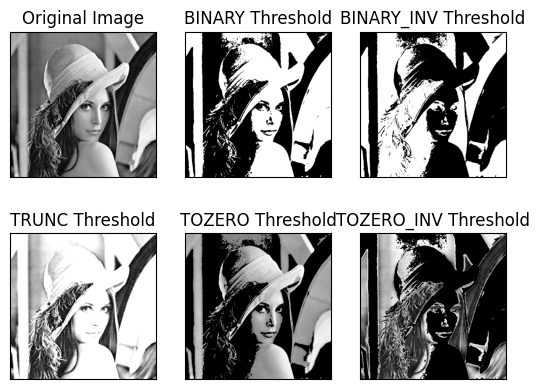

In [11]:


# Load the image
img = cv2.imread('/content/drive/MyDrive/PVCK_images/lena.jpg', 0)

# BINARY threshold
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# BINARY_INV threshold
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# TRUNC threshold
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

# TOZERO threshold
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

# TOZERO_INV threshold
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Display the images
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(thresh1, cmap='gray')
plt.title('BINARY Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(thresh2, cmap='gray')
plt.title('BINARY_INV Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(thresh3, cmap='gray')
plt.title('TRUNC Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(thresh4, cmap='gray')
plt.title('TOZERO Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(thresh5, cmap='gray')
plt.title('TOZERO_INV Threshold'), plt.xticks([]), plt.yticks([])

plt.show()

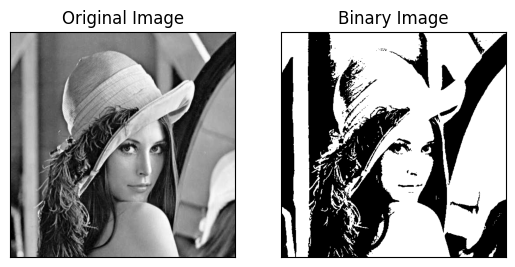

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/PVCK_images/lena.jpg', 0)

# Calculate the normalized histogram of the image
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
hist_norm = hist.astype('float32') / img.size

# Calculate the cumulative sum of the normalized histogram
cumsum = np.cumsum(hist_norm)

# Calculate the cumulative mean of the normalized histogram
cumsum_mean = np.cumsum(hist_norm * np.arange(0, 256))

# Calculate the global mean of the image
global_mean = cumsum_mean[-1]

# Calculate the between-class variance for all possible threshold values
between_class_variances = np.zeros(256)
for i in range(1, 256):
    w0 = cumsum[i]
    w1 = 1 - w0
    if w0 == 0 or w1 == 0:
        continue
    mu0 = cumsum_mean[i] / w0
    mu1 = (global_mean - cumsum_mean[i]) / w1
    between_class_variances[i] = w0 * w1 * (mu0 - mu1) ** 2

# Find the optimal threshold value that maximizes the between-class variance
optimal_threshold = np.argmax(between_class_variances)

# Apply the optimal threshold to the image
binary_img = np.zeros_like(img)
binary_img[img > optimal_threshold] = 255

# Display the original image and the binary image
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])

plt.show()

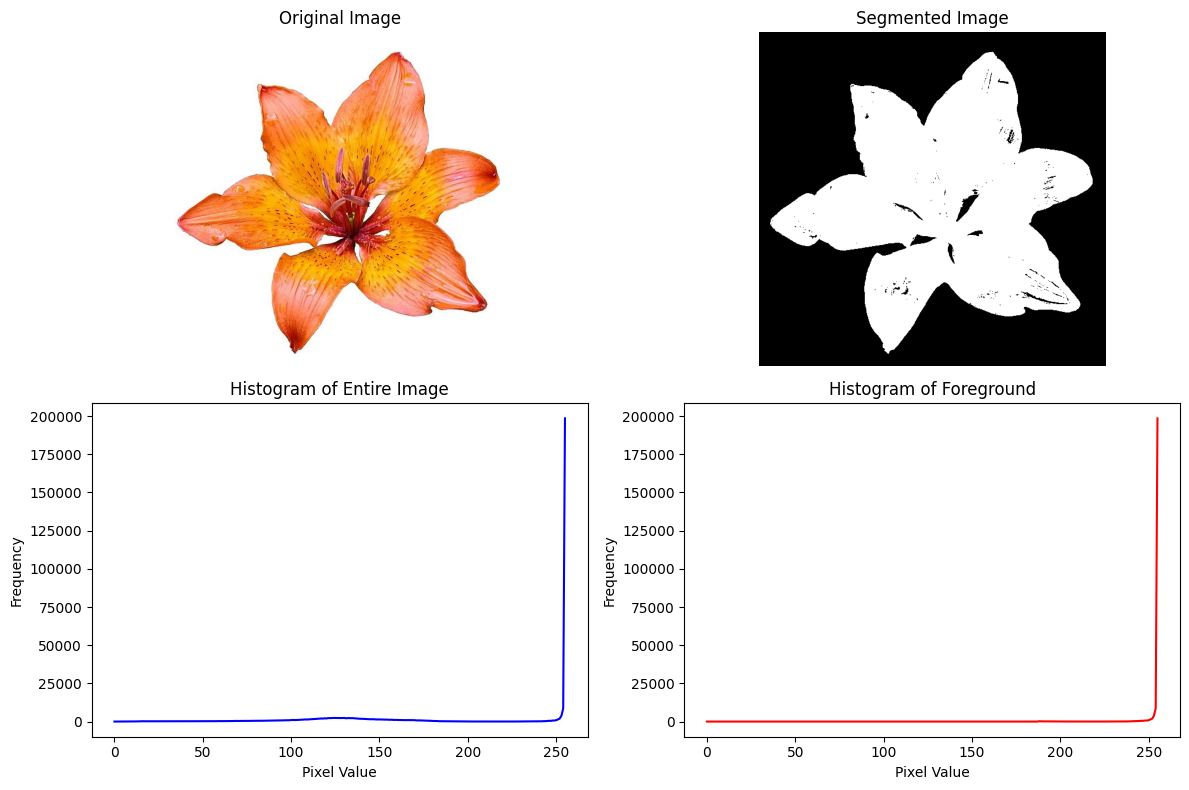

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image from the images folder
img = cv.imread('/content/drive/MyDrive/PVCK_images/lily.jpg')

# Convert the image from RGB to BGR
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

# Convert the image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the foreground from the background
ret, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Create a mask from the thresholded image
mask = np.zeros_like(img_gray)
mask[thresh > 0] = 255

# Calculate the histogram of the entire image
hist_full = cv.calcHist([img_gray], [0], None, [256], [0, 256])

# Calculate the histogram of the foreground image using the mask
hist_fg = cv.calcHist([img_gray], [0], mask, [256], [0, 256])

# Plot the original image, the segmented image and the histograms
mask = 255 - mask
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(222)
plt.imshow(mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.subplot(223)
plt.plot(hist_full, color='b')
plt.title('Histogram of Entire Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(224)
plt.plot(hist_fg, color='r')
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close the plot window
plt.close()

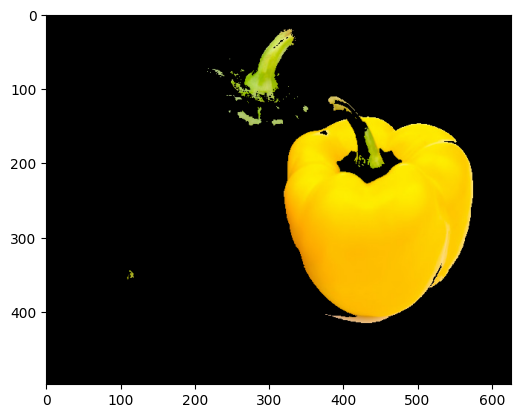

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess
image = cv2.imread('/content/drive/MyDrive/PVCK_images/peppers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape  # Get the height, width, and number of channels
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

# KMeans cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
clusters = 3
_, labels, centers = cv2.kmeans(pixels, clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Flatten labels
labels = labels.reshape((h, w))

# Masked image
masked_image = np.copy(image)

# Mask yellow
yellow_cluster = 0
for i in range(clusters):
    if np.all(centers[i] > [100, 100, 0]) and np.all(centers[i] < [255, 255, 150]):
        yellow_cluster = i
        break

# Apply mask
masked_image[labels != yellow_cluster] = [0, 0, 0]

# Display
plt.imshow(masked_image)
plt.show()

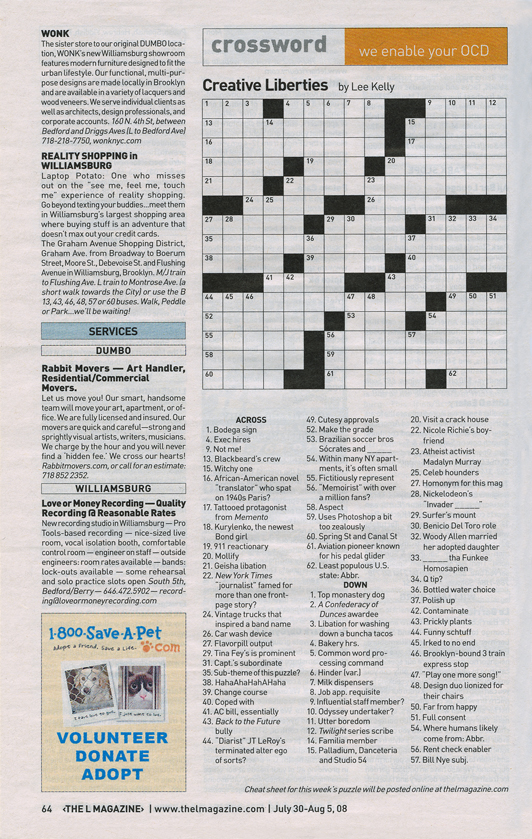

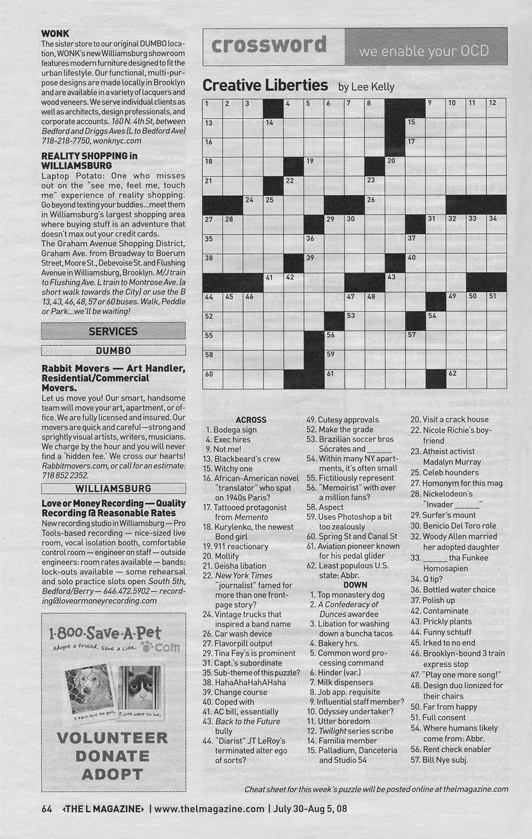

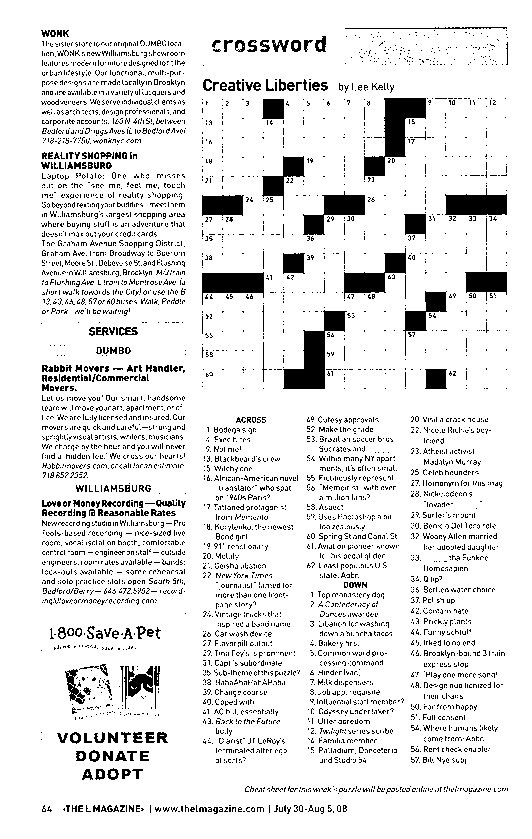

In [16]:
import cv2
from google.colab.patches import cv2_imshow

# Load the color (RGB) image
image_path = '/content/drive/MyDrive/PVCK_images/crossword.jpg'
color_image = cv2.imread(image_path)  # Read the color image

# Convert the color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the grayscale image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original color, grayscale, and thresholded images
cv2_imshow(color_image)
cv2_imshow(gray_image)
cv2_imshow(binary_image)